# fly_data object : defined in working_functions.py

Things to implement in it :
    -more metadata ?

method the object should have :
    -output the object seen by the fly at a given time based on all the other fly object in the "session" (or just given a number of fly objects)

In [1]:
    ### Necessary modules

#for plots
import matplotlib.pyplot as plt


# trajectorytools needs to be installed. To installed follow the instructions 
# at http://www.github.com/fjhheras/trajectorytools
from trajectorytools.constants import dir_of_data
import trajectorytools as tt
import trajectorytools.plot as ttplot
import trajectorytools.socialcontext as ttsocial

#My functions
from working_functions import *

#For importing files and timing cells.
import pickle as pkl
import time
import matplotlib.mlab as mlab

Analysis function based on numerous fly_data objects from a single video :

    -position_summary: summarizes where we can find other flies relatively to our focus fly

    -A focus fly should be defined
    -Relative_fly object should be calculates based on the focus fly
    -What to calculate of this ?
    -Correlation between "turning" of the fly (derivation of orientation) and position of other flies ("global" position and specific position of every fly)

Landscape function ?:
    -Given a focus fly and a set of object, single-object projection of everything the fly sees ? 

In [2]:
def position_summary(focus_fly, flystack):
    relflystack = list()
    for fly in flystack:
        relflystack.append(relative_fly(focus_fly, fly))
    
        


/usr/lib/python3/dist-packages/IPython/extensions/cythonmagic.py:21: UserWarning: The Cython magic has been moved to the Cython package
  warnings.warn("""The Cython magic has been moved to the Cython package""")


Cell below doesn't need to be executed, is just here to write down data so it's possible to pick it up quickly afterward (get_ori takes ~2min to run)

In [5]:
save_ori_pickle("fly2")

/home/maubry/python/idtrackerai/working_functions.py:274: RuntimeWarning: divide by zero encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))
/home/maubry/python/idtrackerai/working_functions.py:274: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))


time elapsed : 2.0min and 7sec


In [45]:
st = time.time()
Dir = "/home/maubry/python/idtrackerai/raw"
name = "6flies_2"
video = name+".avi"
traj= name+".npy"
flystack = get_ori(Dir, video, traj)
laps = time.time() - st
print('time elapsed : {}min and {}sec'.format(laps//60, int(laps%60)))

pkl_name = video.strip('.avi') + "_ori_data.pkl"
f = open(pkl_name, "wb")
pkl.dump(flystack, f)

/home/maubry/python/idtrackerai/working_functions.py:271: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))
/home/maubry/python/idtrackerai/working_functions.py:271: RuntimeWarning: divide by zero encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))


time elapsed : 7.0min and 23sec


orientations have been corrected only
Correlation is  0.1140938813898623
orientations have been corrected and flipped +90 degrees
Correlation is  0.08689735104389694
[ True  True  True ...  True  True  True]


/home/maubry/python/idtrackerai/working_functions.py:95: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


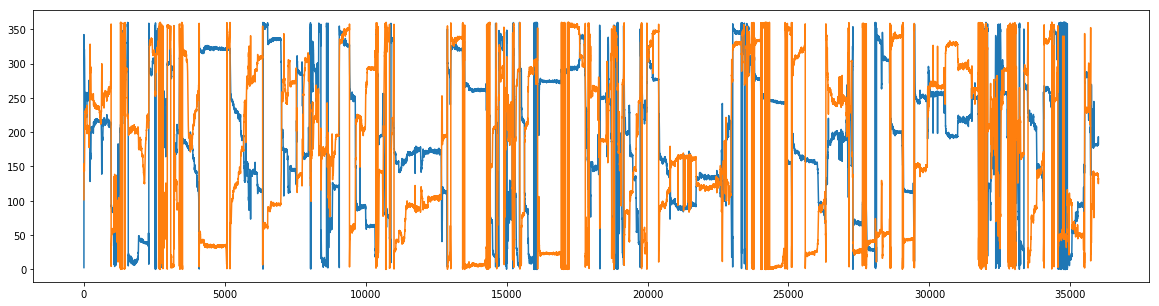

In [3]:
flystack = get_ori_pickle('6flies_1')

fly = flystack[1]
fly_correc = copy.deepcopy(fly)
fly_correc.ori_correc(overwrite=True)

fly2 = flystack[2]
fly2_correc = copy.deepcopy(fly2)
fly2_correc.ori_correc(overwrite=True)
# #Get first fly and correct its orientations

rel = relative_fly(fly_correc, fly2_correc)
showrange = range(10000)

plt.figure(figsize=(20,5))
plt.plot(fly_correc.orientations)
plt.plot(rel.angle)
print(rel.angle <= 220)

/home/maubry/python/idtrackerai/working_functions.py:95: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360


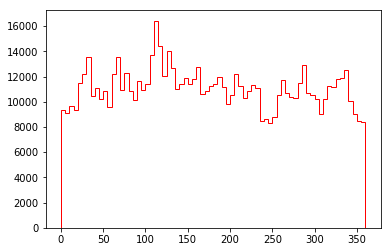

NameError: name 'x_stack' is not defined

In [6]:
flystack = get_ori_pickle('6flies_1')

hue = relative_set(flystack)
            
            

dist_stack = hue.dist[~np.isnan(hue.dist)]
angle_stack = hue.orientations[~np.isnan(hue.orientations)]


plt.hist(angle_stack, bins=72, range=[0, 360], histtype='step',edgecolor='r')
# H, bins = np.histogram(angle_stack[:6], bins=72, range=[0, 360])
# H+=np.histogram(angle_stack[6:], bins=72,range=[0,360])[0]

# bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]
# plt.step(bincentres,H,where='mid',color='b',linestyle='--')

plt.show()



# Define bin edges: (left/bottom limit, right/top limit, bin width)
h_min = np.min([np.nanmin(x_stack)/2, np.nanmin(y_stack)/2])
h_max = np.min([np.nanmax(x_stack)/2, np.nanmax(y_stack)/2])
bin_size = (h_max - h_min)/50
bins = [np.arange(h_min, h_max, bin_size),np.arange(h_min, h_max, bin_size)]

H, xedges, yedges = np.histogram2d(y_stack, x_stack, bins=bins,normed = True)
X, Y = np.meshgrid(xedges, yedges)
fig, ax_meanposmap = plt.subplots(figsize=(19,7))
im = ax_meanposmap.pcolormesh(X, Y, H)
# Add colorbar, labels, etc.
ax_cb = fig.colorbar(im, ax=ax_meanposmap)
ax_meanposmap.set_aspect('equal','box')
ax_meanposmap.set_title('All individuals',fontsize=20);
ax_meanposmap.set_xlabel('Left-Right',fontsize = 20)
ax_meanposmap.set_ylabel('Back-Front',fontsize = 20)
ax_meanposmap.tick_params(labelsize=14)
ax_cb.ax.tick_params(labelsize=24)
ax_cb.set_label('Neighbour density',fontsize=24)


In [45]:
# polar_histogram(get_ori_pickle('6flies_1'))
# polar_histogram(get_ori_pickle('6flies_1'),distance=False)

# polar_histogram(get_ori_pickle('6flies_2'), force_bin=10)
# polar_histogram(get_ori_pickle('6flies_2'),distance=False, force_bin=50)


from scipy.stats import ks_2samp


stack = relative_set(get_ori_pickle('6flies_1'))

#Creating two uniform datasets of same statistical caracteristics as our angles and distances
rand_angles = np.random.uniform(0,360,100)
rand_distances = np.random.uniform(30,800,100)

print(stats.describe(rand_angles))
print(stats.describe(stack.orientations[~np.isnan(stack.orientations)]))

#Testing to see if our angles and distances are randomly distributed or not
print(ks_2samp(rand_angles, stack.orientations))
print(ks_2samp(rand_distances, stack.dist))

/home/maubry/python/idtrackerai/working_functions.py:95: RuntimeWarning: invalid value encountered in less_equal
  angle[angle <= 0] += 360


TypeError: random_sample() takes at most 1 positional argument (3 given)